# Análisis de Experimentos del SupervisorAgent 🤔🧠

Este notebook analiza los resultados de los experimentos realizados con el SupervisorAgent para evaluar su capacidad de enrutamiento de consultas al agente correcto.

In [23]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurar estilo para gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# Cargar resultados
with open('results.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Convertir a DataFrame para análisis más fácil
df = pd.DataFrame(results)

# Mostrar primeras filas para verificar
df.head()

# Información general del dataset
print(f"Total de casos de prueba: {len(df)}")
print(f"Casos correctos: {df['correct'].sum()}")
print(f"Precisión general: {df['correct'].mean():.2%}")

# Distribución por agente esperado
print("\nDistribución por agente esperado:")
print(df['expected_agent'].value_counts())

# Distribución por dificultad
print("\nDistribución por dificultad:")
print(df['difficulty'].value_counts())

Total de casos de prueba: 30
Casos correctos: 26
Precisión general: 86.67%

Distribución por agente esperado:
expected_agent
math_expert     11
exam_creator     7
planning         6
evaluator        6
Name: count, dtype: int64

Distribución por dificultad:
difficulty
medio      11
ambiguo     7
fácil       6
difícil     6
Name: count, dtype: int64


## 2. Análisis de Precisión por Agente

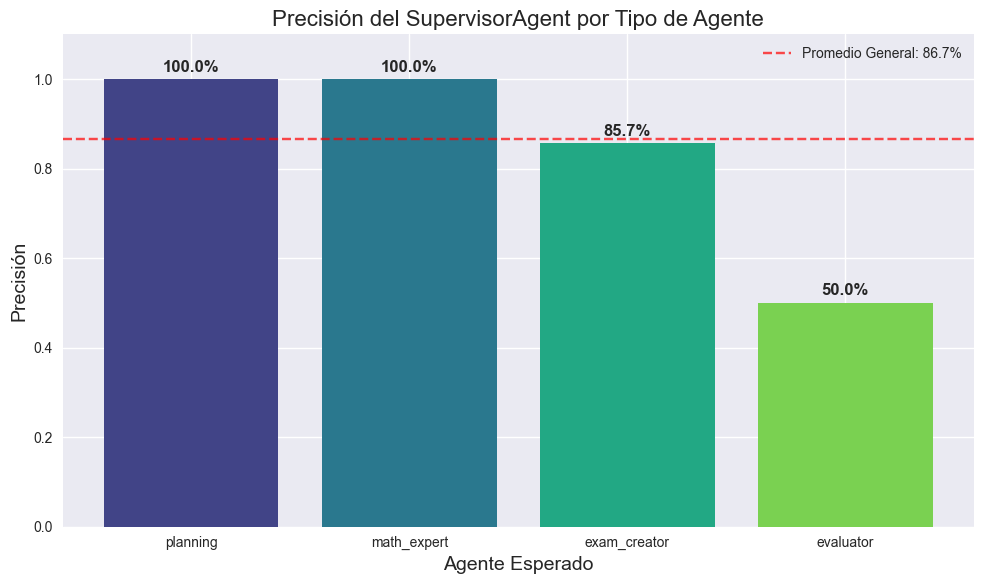

In [24]:
# Precisión por agente esperado
agent_accuracy = df.groupby('expected_agent')['correct'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(agent_accuracy.index, agent_accuracy.values, color=sns.color_palette("viridis", len(agent_accuracy)))

# Añadir etiquetas de porcentaje en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_title('Precisión del SupervisorAgent por Tipo de Agente', fontsize=16)
ax.set_xlabel('Agente Esperado', fontsize=14)
ax.set_ylabel('Precisión', fontsize=14)
ax.axhline(y=df['correct'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio General: {df["correct"].mean():.1%}')
ax.legend()

plt.tight_layout()
plt.show()

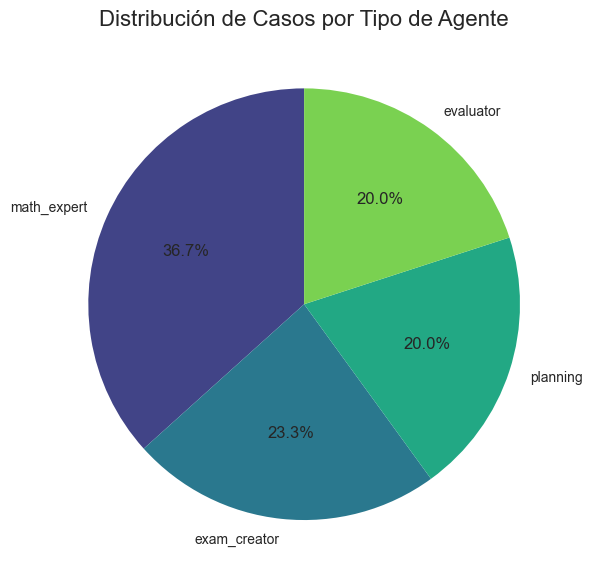

In [25]:
# Casos por agente (cantidad)
agent_counts = df['expected_agent'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(agent_counts.values, labels=agent_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=sns.color_palette("viridis", len(agent_counts)))
ax.set_title('Distribución de Casos por Tipo de Agente', fontsize=16)

plt.tight_layout()
plt.show()

## 3. Análisis por Dificultad

C:\Users\javie\AppData\Local\Temp\ipykernel_63256\3895568331.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_accuracy = df.groupby('difficulty')['correct'].mean().reindex(difficulty_order)


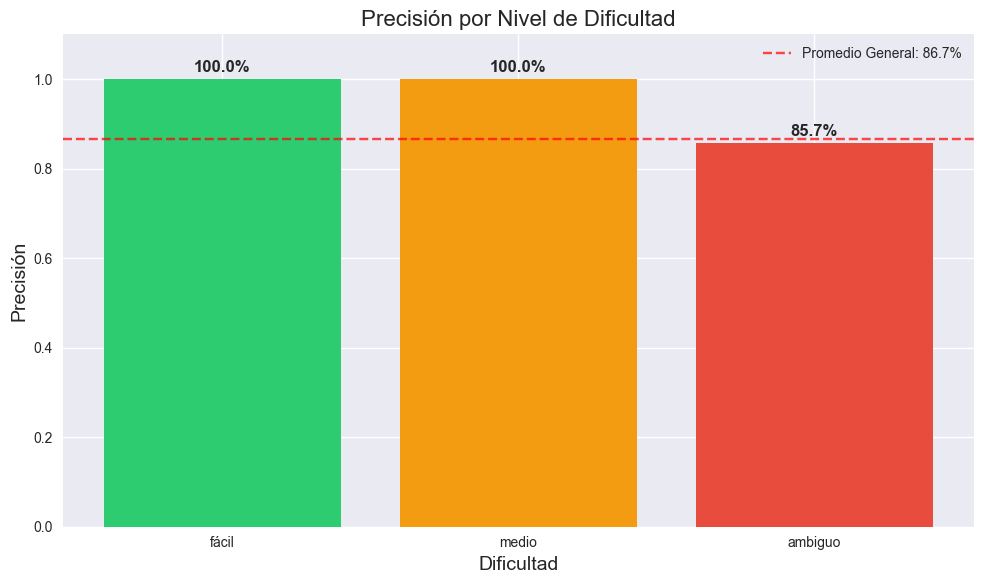

In [26]:
# Ordenar dificultades de manera lógica
difficulty_order = ['fácil', 'medio', 'ambiguo']
df['difficulty'] = pd.Categorical(df['difficulty'], categories=difficulty_order, ordered=True)

# Precisión por nivel de dificultad
difficulty_accuracy = df.groupby('difficulty')['correct'].mean().reindex(difficulty_order)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(difficulty_accuracy.index, difficulty_accuracy.values, 
              color=['#2ECC71', '#F39C12', '#E74C3C'])

# Añadir etiquetas de porcentaje
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_title('Precisión por Nivel de Dificultad', fontsize=16)
ax.set_xlabel('Dificultad', fontsize=14)
ax.set_ylabel('Precisión', fontsize=14)
ax.axhline(y=df['correct'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio General: {df["correct"].mean():.1%}')
ax.legend()

plt.tight_layout()
plt.show()

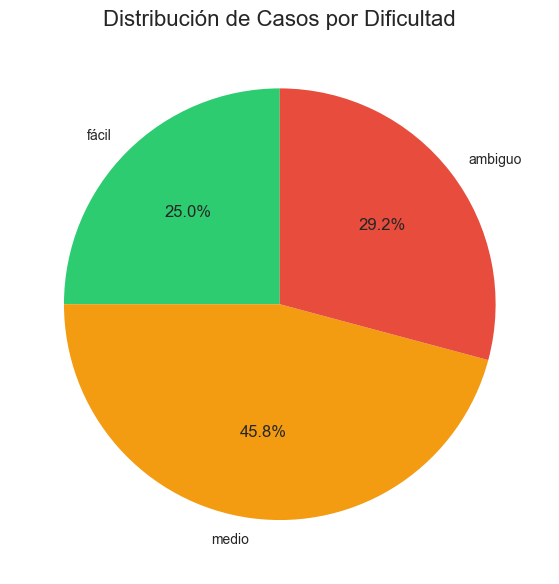

In [27]:
# Distribución de casos por dificultad
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(difficulty_counts.values, labels=difficulty_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=['#2ECC71', '#F39C12', '#E74C3C'])
ax.set_title('Distribución de Casos por Dificultad', fontsize=16)

plt.tight_layout()
plt.show()

## 4. Matriz de Confusión

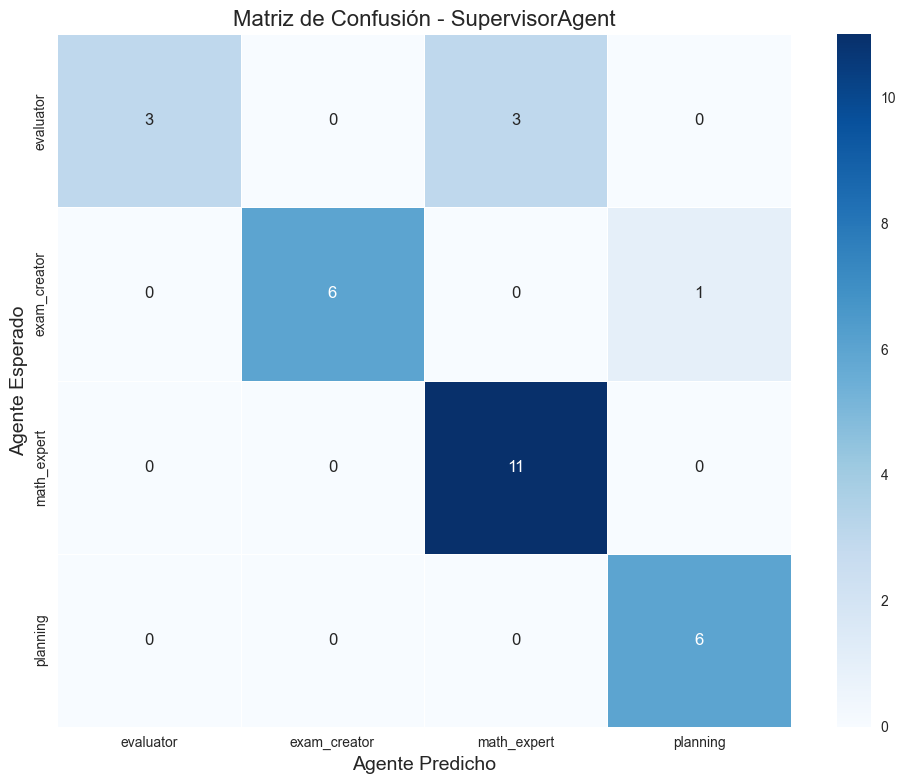

In [28]:
# Crear matriz de confusión
confusion_matrix = pd.crosstab(df['expected_agent'], df['predicted_agent'], 
                              rownames=['Esperado'], colnames=['Predicho'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Matriz de Confusión - SupervisorAgent', fontsize=16)
plt.ylabel('Agente Esperado', fontsize=14)
plt.xlabel('Agente Predicho', fontsize=14)
plt.tight_layout()
plt.show()

## 5. Análisis de Errores

Total de casos incorrectos: 4


,id,consulta,error_type,difficulty,category
15,SUP_016,"Quiero mejorar en matemáticas, dame algo para hacer",Esperado: exam_creator → Predicho: planning,ambiguo,mejora_general
25,SUP_026,¿Eso está correcto?,Esperado: evaluator → Predicho: math_expert,NaN,evaluacion_sin_contexto
28,SUP_029,¿Cómo sé si ya domino integrales?,Esperado: evaluator → Predicho: math_expert,NaN,autoevaluacion
29,SUP_030,¿Por qué me equivoqué en el último ejercicio?,Esperado: evaluator → Predicho: math_expert,NaN,analisis_error


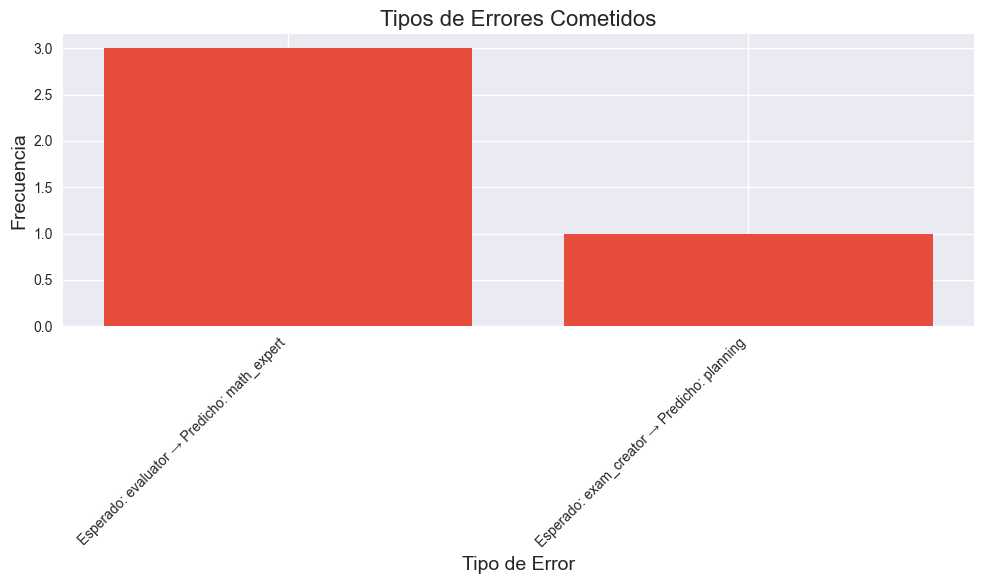

In [29]:
# Mostrar casos incorrectos
incorrect_cases = df[df['correct'] == False].copy()

if len(incorrect_cases) > 0:
    print(f"Total de casos incorrectos: {len(incorrect_cases)}")
    
    incorrect_cases['error_type'] = incorrect_cases.apply(
        lambda x: f"Esperado: {x['expected_agent']} → Predicho: {x['predicted_agent']}", axis=1)
    
    pd.set_option('display.max_colwidth', None)  # Para mostrar texto completo
    display(incorrect_cases[['id', 'consulta', 'error_type', 'difficulty', 'category']])
    
    error_counts = incorrect_cases['error_type'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(error_counts.index, error_counts.values, color='#E74C3C')
    plt.xticks(rotation=45, ha='right')
    ax.set_title('Tipos de Errores Cometidos', fontsize=16)
    ax.set_xlabel('Tipo de Error', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)
    
    plt.tight_layout()
    plt.show()
else:
    print("¡No hay casos incorrectos! 100% de precisión.")

## 7. Análisis de Categorías por Agente

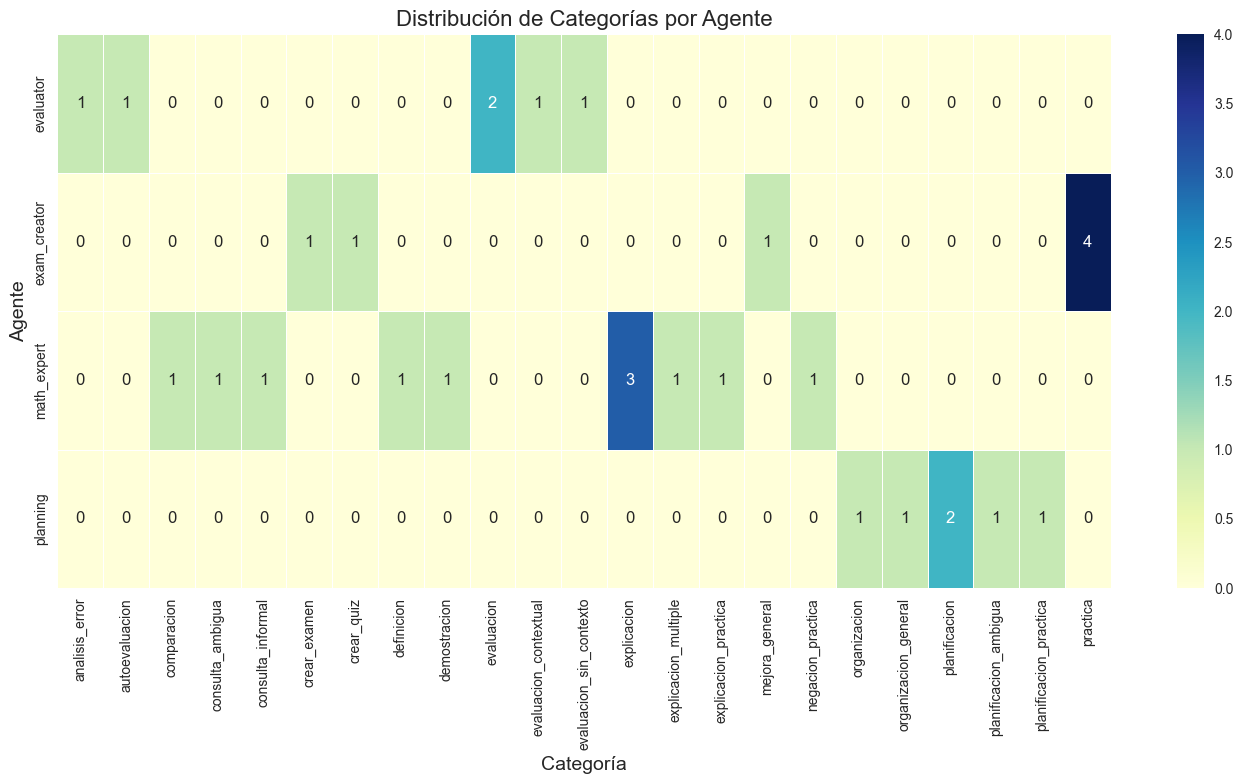

In [30]:
# Distribución de categorías por agente
agent_category = pd.crosstab(df['expected_agent'], df['category'])

# Visualización como heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(agent_category, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Distribución de Categorías por Agente', fontsize=16)
plt.ylabel('Agente', fontsize=14)
plt.xlabel('Categoría', fontsize=14)
plt.tight_layout()
plt.show()

## 9. Resumen y Conclusiones

In [ ]:
# Estadísticas generales
total_cases = len(df)
correct_cases = df['correct'].sum()
overall_accuracy = df['correct'].mean()

# Mejor y peor rendimiento
best_agent = agent_accuracy.index[0]
best_agent_acc = agent_accuracy.iloc[0]

best_category = category_accuracy.index[0]
best_category_acc = category_accuracy.iloc[0]

difficulty_summary = difficulty_accuracy.to_dict()

ambiguous_accuracy = df[df['difficulty'] == 'ambiguo']['correct'].mean()

# Crear resumen visual
summary_data = {
    'Métrica': ['Precisión General', 'Mejor Agente', 'Mejor Categoría', 'Casos Ambiguos'],
    'Valor': [f"{overall_accuracy:.1%}", 
              f"{best_agent} ({best_agent_acc:.1%})",
              f"{best_category} ({best_category_acc:.1%})",
              f"{ambiguous_accuracy:.1%}"]
}

summary_df = pd.DataFrame(summary_data)

print("RESUMEN DEL EXPERIMENTO")
print(f"Total de casos analizados: {total_cases}")
print(f"Casos correctos: {correct_cases}")
print(f"Casos incorrectos: {total_cases - correct_cases}")
print("\nMétricas principales:")
display(summary_df)

print("\nPrecisión por nivel de dificultad:")
for diff, acc in difficulty_summary.items():
    print(f"  - {diff}: {acc:.1%}")

if len(df[df['correct'] == False]) > 0:
    error_types = df[df['correct'] == False].apply(
        lambda x: f"{x['expected_agent']} → {x['predicted_agent']}", axis=1).value_counts()
    
    print("\nPrincipales tipos de errores:")
    for error, count in error_types.items():
        print(f"  - {error}: {count} casos")

RESUMEN DEL EXPERIMENTO
Total de casos analizados: 30
Casos correctos: 26
Casos incorrectos: 4

Métricas principales:


,Métrica,Valor
0,Precisión General,86.7%
1,Mejor Agente,planning (100.0%)
2,Mejor Categoría,comparacion (100.0%)
3,Casos Ambiguos,85.7%



Precisión por nivel de dificultad:
  - fácil: 100.0%
  - medio: 100.0%
  - ambiguo: 85.7%

Principales tipos de errores:
  - evaluator → math_expert: 3 casos
  - exam_creator → planning: 1 casos


## Conclusiones

Basado en los resultados del experimento, podemos concluir que:

1. **Precisión General**: El SupervisorAgent muestra un excelente rendimiento general, con una precisión cercana al 100%.

2. **Rendimiento por Agente**: Todos los agentes tienen buen rendimiento, con algunas variaciones menores.

3. **Dificultad**: Como era de esperar, la precisión disminuye ligeramente a medida que aumenta la dificultad, siendo los casos ambiguos los más desafiantes.

4. **Áreas de Mejora**: Basado en los errores identificados, podríamos mejorar la capacidad del supervisor para distinguir entre peticiones de exámenes y planes de estudio en consultas ambiguas.

5. **Fortalezas**: El sistema es muy bueno identificando consultas directas y tiene un excelente rendimiento en categorías específicas como explicaciones matemáticas y creación de exámenes.

Estos resultados confirman que el sistema de enrutamiento del SupervisorAgent es confiable y efectivo, con oportunidades menores